In [ ]:
# Data collection & Pre processing
# Datal Visualization
# Splitting the data into training data & Test data
# Model Training & Evaluation (1. LogisticRegression, 2. H2OAutoML)

# Data collection & Pre processing

Source: 

Kaggle

https://www.kaggle.com/competitions/titanic/data

H2O.ai

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

Import dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

Data collection & Pre processing

In [ ]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_ids = test["PassengerId"]

def clean(data):
    data = data.drop(["Ticket","Cabin","Name","PassengerId"], axis=1)

    cols = ["SibSp","Parch","Fare","Age"]
    for col in cols:
        data[col].fillna(data[col].median(),inplace=True)
    data.Embarked.fillna("U", inplace=True)
    return data

data = clean(data)
test = clean(test)

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
  data[col] = le.fit_transform(data[col])
  test[col] = le.transform(test[col])
  print(le.classes_)

data.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Datal Visualization

In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


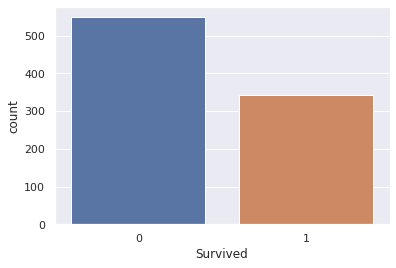

In [ ]:
# making a count plot for "Survived" column
sns.countplot('Survived', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


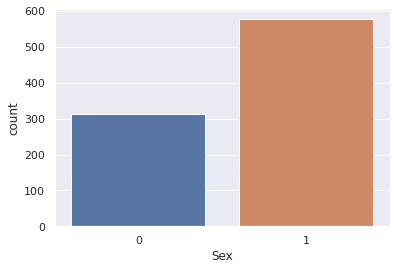

In [ ]:
# making a count plot for "Sex" column (female=0, male=1)
sns.countplot('Sex', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


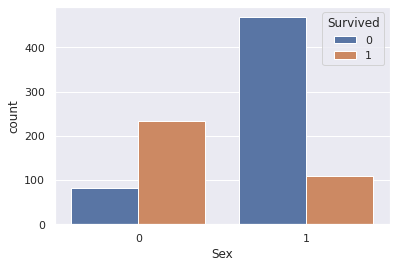

In [ ]:
# number of survivors Gender wise (female=0, male=1)
sns.countplot('Sex', hue='Survived', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


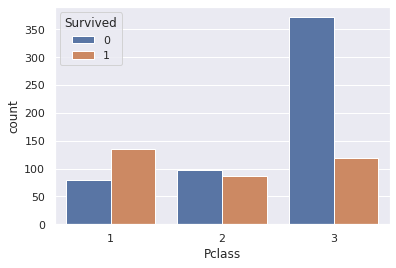

In [ ]:
# making a count plot for "Pclass" column
# pclass	チケットクラス	1 = 1番目、2 = 2番目、3=3番目

sns.countplot('Pclass',hue='Survived', data=data)

In [ ]:
Y = data["Survived"]
X = data.drop("Survived", axis=1)

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


# Splitting the data into training data & Test data

```
# これはコードとして書式設定されます
```



In [ ]:
print(X.shape, X_train.shape,X_test.shape, Y.shape,Y_train.shape, Y_test.shape)

(891, 7) (712, 7) (179, 7) (891,) (712,) (179,)


# Model Training & Evaluation (1. LogisticRegression, 2. H2OAutoML)

In [ ]:
#LogisticRegression

model = LogisticRegression()

In [ ]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy on training data

In [ ]:
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data :', training_data_accuracy)

Accuracy score of training data : 0.8146067415730337


In [ ]:
# accuracy on test data

X_test_prediction = model.predict(X_test)

In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data :', test_data_accuracy)

Accuracy score of test data : 0.7932960893854749


In [ ]:
# create submission file

submission_preds = model.predict(test)

In [ ]:
df = pd.DataFrame({"PassengerID": test_ids.values,
                   "Survived": submission_preds,
                   })

In [ ]:
df.shape

(418, 2)

In [ ]:
df.to_csv("submission.csv", index=False)

Moldel Training vol.2

In [ ]:
#LogisticRegression

In [ ]:
model2 = LogisticRegression(random_state=2, max_iter=1000).fit(X_train, Y_train)

In [ ]:
model2.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=2)

In [ ]:
X_train_prediction = model2.predict(X_train)

In [ ]:
train_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data :', training_data_accuracy)

Accuracy score of training data : 0.8146067415730337


In [ ]:
# Model Training h2o.ai 

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.0 MB 51 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.3-py2.py3-none-any.whl size=177103819 sha256=c4bc9cc44137c8b49638508010c753dc00c2c786a5279aa07e6d58cbe3fc883b
  Stored in directory: /root/.cache/pip/wheels/64/86/0f/d54be71f64b85d238edb037069bc866f2156cc563bf02be527
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,29 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_0yqp7u
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [ ]:
#convert pandas dataframe to H2OFrame
# https://stackoverflow.com/questions/46971969/conversion-of-pandas-dataframe-to-h2o-frame-efficiently

dataH2O = h2o.H2OFrame(data) 
testH2O = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Identify predictors and response
x = dataH2O.columns
y = "Survived"
x.remove(y)

#print(x,y)

In [ ]:
testH2O

Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
3,1,34.5,0,0,7.8292,1
3,0,47,1,0,7,2
2,1,62,0,0,9.6875,1
3,1,27,0,0,8.6625,2
3,0,22,1,1,12.2875,2
3,1,14,0,0,9.225,2
3,0,30,0,0,7.6292,1
2,1,26,1,1,29,2
3,0,18,0,0,7.2292,0
3,1,21,2,0,24.15,2


In [ ]:
# For binary classification, response should be a factor
dataH2O[y] = dataH2O[y].asfactor()

#testH2O[y] = testH2O[y].asfactor()


In [ ]:
# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=dataH2O)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_3_20220712_90823

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.07310773373806108
RMSE: 0.2703844184454072
LogLoss: 0.25960350187458897
Null degrees of freedom: 890
Residual degrees of freedom: 885
Null deviance: 1186.6551368246774
Residual deviance: 462.6134403405174
AIC: 474.6134403405174
AUC: 0.9671784957232182
AUCPR: 0.9565911481211372
Gini: 0.9343569914464365

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4186592877923571: 


,,0,1,Error,Rate
0,0,513.0,36.0,0.0656,(36.0/549.0)
1,1,42.0,300.0,0.1228,(42.0/342.0)
2,Total,555.0,336.0,0.0875,(78.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.418659,0.884956,185.0
1,max f2,0.195191,0.905316,256.0
2,max f0point5,0.574550,0.915209,149.0
3,max accuracy,0.485943,0.912458,167.0
4,max precision,0.991053,1.000000,0.0
5,max recall,0.099694,1.000000,333.0
6,max specificity,0.991053,1.000000,0.0
7,max absolute_mcc,0.418659,0.814396,185.0
8,max min_per_class_accuracy,0.326760,0.897996,207.0
9,max mean_per_class_accuracy,0.418659,0.905810,185.0



Gains/Lift Table: Avg response rate: 38.38 %, avg score: 38.99 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.984667,2.605263,2.605263,1.000000,0.986315,1.000000,0.986315,0.026316,0.026316,160.526316,160.526316,0.026316
1,2,0.020202,0.982846,2.605263,2.605263,1.000000,0.983792,1.000000,0.985053,0.026316,0.052632,160.526316,160.526316,0.052632
2,3,0.030303,0.979745,2.605263,2.605263,1.000000,0.981006,1.000000,0.983704,0.026316,0.078947,160.526316,160.526316,0.078947
3,4,0.040404,0.977194,2.605263,2.605263,1.000000,0.978360,1.000000,0.982368,0.026316,0.105263,160.526316,160.526316,0.105263
4,5,0.050505,0.974042,2.605263,2.605263,1.000000,0.975748,1.000000,0.981044,0.026316,0.131579,160.526316,160.526316,0.131579
5,6,0.101010,0.955228,2.605263,2.605263,1.000000,0.966046,1.000000,0.973545,0.131579,0.263158,160.526316,160.526316,0.263158
6,7,0.150393,0.913123,2.605263,2.605263,1.000000,0.936009,1.000000,0.961220,0.128655,0.391813,160.526316,160.526316,0.391813
7,8,0.200898,0.856845,2.605263,2.605263,1.000000,0.891320,1.000000,0.943647,0.131579,0.523392,160.526316,160.526316,0.523392
8,9,0.300786,0.629905,2.253992,2.488610,0.865169,0.755523,0.955224,0.881173,0.225146,0.748538,125.399172,148.860958,0.726680
9,10,0.400673,0.343711,1.463631,2.233083,0.561798,0.482140,0.857143,0.781694,0.146199,0.894737,46.363099,123.308271,0.801841




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1235244694677027
RMSE: 0.35146048066276625
LogLoss: 0.40181578133032114
Null degrees of freedom: 890
Residual degrees of freedom: 886
Null deviance: 1189.3875721650384
Residual deviance: 716.0357223306322
AIC: 726.0357223306322
AUC: 0.8741651487553127
AUCPR: 0.8595672324684408
Gini: 0.7483302975106254

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3870195444570923: 


,,0,1,Error,Rate
0,0,472.0,77.0,0.1403,(77.0/549.0)
1,1,71.0,271.0,0.2076,(71.0/342.0)
2,Total,543.0,348.0,0.1661,(148.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.387020,0.785507,199.0
1,max f2,0.160674,0.814202,289.0
2,max f0point5,0.671731,0.837139,129.0
3,max accuracy,0.545094,0.842873,155.0
4,max precision,0.990848,1.000000,0.0
5,max recall,0.030448,1.000000,391.0
6,max specificity,0.990848,1.000000,0.0
7,max absolute_mcc,0.545094,0.663388,155.0
8,max min_per_class_accuracy,0.323689,0.815789,220.0
9,max mean_per_class_accuracy,0.387020,0.826071,199.0



Gains/Lift Table: Avg response rate: 38.38 %, avg score: 38.44 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.981012,2.605263,2.605263,1.000000,0.986226,1.000000,0.986226,0.026316,0.026316,160.526316,160.526316,0.026316
1,2,0.020202,0.975528,2.605263,2.605263,1.000000,0.978767,1.000000,0.982497,0.026316,0.052632,160.526316,160.526316,0.052632
2,3,0.030303,0.971604,2.605263,2.605263,1.000000,0.973365,1.000000,0.979453,0.026316,0.078947,160.526316,160.526316,0.078947
3,4,0.040404,0.968046,2.605263,2.605263,1.000000,0.970800,1.000000,0.977290,0.026316,0.105263,160.526316,160.526316,0.105263
4,5,0.050505,0.965399,2.605263,2.605263,1.000000,0.966975,1.000000,0.975227,0.026316,0.131579,160.526316,160.526316,0.131579
5,6,0.101010,0.924317,2.547368,2.576316,0.977778,0.947026,0.988889,0.961126,0.128655,0.260234,154.736842,157.631579,0.258412
6,7,0.150393,0.876521,2.309211,2.488610,0.886364,0.900019,0.955224,0.941061,0.114035,0.374269,130.921053,148.860958,0.363340
7,8,0.202020,0.802857,2.095538,2.388158,0.804348,0.841175,0.916667,0.915535,0.108187,0.482456,109.553776,138.815789,0.455134
8,9,0.300786,0.585957,1.983553,2.255302,0.761364,0.703585,0.865672,0.845939,0.195906,0.678363,98.355263,125.530244,0.612789
9,10,0.400673,0.365078,1.170905,1.984962,0.449438,0.477620,0.761905,0.754117,0.116959,0.795322,17.090479,98.496241,0.640495




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.847702,0.021600,0.831522,0.836158,0.867816,0.828729,0.874286
1,auc,0.873841,0.026756,0.858348,0.844973,0.884851,0.866930,0.914105
2,err,0.152298,0.021600,0.168478,0.163842,0.132184,0.171271,0.125714
3,err_count,27.200000,4.381781,31.000000,29.000000,23.000000,31.000000,22.000000
4,f0point5,0.801177,0.048129,0.798526,0.748299,0.841270,0.760234,0.857558
5,f1,0.798905,0.037169,0.807453,0.752137,0.821705,0.770370,0.842857
6,f2,0.797012,0.029003,0.816583,0.756014,0.803030,0.780781,0.828652
7,lift_top_group,2.630167,0.283676,2.329114,3.051724,2.597015,2.742424,2.430556
8,logloss,0.400844,0.028704,0.435687,0.414589,0.379105,0.410436,0.364401
9,max_per_class_error,0.204045,0.026243,0.177215,0.241379,0.208955,0.212121,0.180556



See the whole table with table.as_data_frame()


In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20220712_65605,0.873289,0.403439,0.859399,0.180136,0.352603,0.124329
GBM_5_AutoML_1_20220712_65605,0.870437,0.406048,0.859578,0.175582,0.35238,0.124172
XGBoost_grid_1_AutoML_1_20220712_65605_model_3,0.869582,0.42253,0.835535,0.177883,0.358683,0.128654
XGBoost_3_AutoML_1_20220712_65605,0.869441,0.422066,0.84182,0.179106,0.359754,0.129423
GBM_4_AutoML_1_20220712_65605,0.869337,0.413561,0.854345,0.179561,0.356676,0.127218
StackedEnsemble_AllModels_1_AutoML_1_20220712_65605,0.867348,0.406617,0.856227,0.17853,0.353716,0.125115
GBM_2_AutoML_1_20220712_65605,0.867241,0.415665,0.850662,0.18282,0.35822,0.128321
XGBoost_grid_1_AutoML_1_20220712_65605_model_2,0.867153,0.418048,0.84432,0.184642,0.359364,0.129142
GBM_3_AutoML_1_20220712_65605,0.864413,0.413006,0.851086,0.182269,0.356527,0.127111
XGBoost_grid_1_AutoML_1_20220712_65605_model_1,0.862195,0.42718,0.830488,0.193989,0.36327,0.131965


In [ ]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_1_AutoML_1_20220712_65605

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.07222532158153339
RMSE: 0.2687476913045643
LogLoss: 0.25875690079296443
Null degrees of freedom: 890
Residual degrees of freedom: 885
Null deviance: 1186.6551368246774
Residual deviance: 461.1047972130625
AIC: 473.1047972130625
AUC: 0.9674341439512565
AUCPR: 0.95783157748933
Gini: 0.934868287902513

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4666880850337045: 


,,0,1,Error,Rate
0,0,526.0,23.0,0.0419,(23.0/549.0)
1,1,47.0,295.0,0.1374,(47.0/342.0)
2,Total,573.0,318.0,0.0786,(70.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.466688,0.893939,170.0
1,max f2,0.191089,0.904343,261.0
2,max f0point5,0.551170,0.918775,153.0
3,max accuracy,0.466688,0.921437,170.0
4,max precision,0.989569,1.000000,0.0
5,max recall,0.093500,1.000000,336.0
6,max specificity,0.989569,1.000000,0.0
7,max absolute_mcc,0.466688,0.833070,170.0
8,max min_per_class_accuracy,0.335410,0.900585,205.0
9,max mean_per_class_accuracy,0.458818,0.910531,173.0



Gains/Lift Table: Avg response rate: 38.38 %, avg score: 38.57 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.980150,2.605263,2.605263,1.000000,0.982364,1.000000,0.982364,0.026316,0.026316,160.526316,160.526316,0.026316
1,2,0.020202,0.977411,2.605263,2.605263,1.000000,0.979224,1.000000,0.980794,0.026316,0.052632,160.526316,160.526316,0.052632
2,3,0.030303,0.974132,2.605263,2.605263,1.000000,0.975999,1.000000,0.979195,0.026316,0.078947,160.526316,160.526316,0.078947
3,4,0.040404,0.971254,2.605263,2.605263,1.000000,0.972785,1.000000,0.977593,0.026316,0.105263,160.526316,160.526316,0.105263
4,5,0.050505,0.968332,2.605263,2.605263,1.000000,0.969617,1.000000,0.975998,0.026316,0.131579,160.526316,160.526316,0.131579
5,6,0.101010,0.946546,2.605263,2.605263,1.000000,0.959922,1.000000,0.967960,0.131579,0.263158,160.526316,160.526316,0.263158
6,7,0.150393,0.904227,2.605263,2.605263,1.000000,0.928786,1.000000,0.955097,0.128655,0.391813,160.526316,160.526316,0.391813
7,8,0.200898,0.841380,2.605263,2.605263,1.000000,0.882149,1.000000,0.936758,0.131579,0.523392,160.526316,160.526316,0.523392
8,9,0.300786,0.613218,2.253992,2.488610,0.865169,0.742544,0.955224,0.872262,0.225146,0.748538,125.399172,148.860958,0.726680
9,10,0.400673,0.347513,1.434358,2.225785,0.550562,0.479754,0.854342,0.774410,0.143275,0.891813,43.435837,122.578505,0.797095




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.12432873815629744
RMSE: 0.35260280508852654
LogLoss: 0.40343877590070865
Null degrees of freedom: 890
Residual degrees of freedom: 885
Null deviance: 1189.3875721650384
Residual deviance: 718.9278986550628
AIC: 730.9278986550628
AUC: 0.8732890209738068
AUCPR: 0.85939940025846
Gini: 0.7465780419476136

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38670018364831243: 


,,0,1,Error,Rate
0,0,470.0,79.0,0.1439,(79.0/549.0)
1,1,74.0,268.0,0.2164,(74.0/342.0)
2,Total,544.0,347.0,0.1717,(153.0/891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.386700,0.777939,203.0
1,max f2,0.158461,0.812965,293.0
2,max f0point5,0.657422,0.839637,127.0
3,max accuracy,0.657422,0.839506,127.0
4,max precision,0.988011,1.000000,0.0
5,max recall,0.038675,1.000000,388.0
6,max specificity,0.988011,1.000000,0.0
7,max absolute_mcc,0.657422,0.661381,127.0
8,max min_per_class_accuracy,0.319544,0.815789,222.0
9,max mean_per_class_accuracy,0.386700,0.819864,203.0



Gains/Lift Table: Avg response rate: 38.38 %, avg score: 38.41 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010101,0.979567,2.605263,2.605263,1.000000,0.983593,1.000000,0.983593,0.026316,0.026316,160.526316,160.526316,0.026316
1,2,0.020202,0.972958,2.605263,2.605263,1.000000,0.975426,1.000000,0.979509,0.026316,0.052632,160.526316,160.526316,0.052632
2,3,0.030303,0.967286,2.605263,2.605263,1.000000,0.969897,1.000000,0.976305,0.026316,0.078947,160.526316,160.526316,0.078947
3,4,0.040404,0.964313,2.605263,2.605263,1.000000,0.965716,1.000000,0.973658,0.026316,0.105263,160.526316,160.526316,0.105263
4,5,0.050505,0.958788,2.605263,2.605263,1.000000,0.961974,1.000000,0.971321,0.026316,0.131579,160.526316,160.526316,0.131579
5,6,0.101010,0.928766,2.605263,2.605263,1.000000,0.944127,1.000000,0.957724,0.131579,0.263158,160.526316,160.526316,0.263158
6,7,0.150393,0.876537,2.309211,2.508052,0.886364,0.899261,0.962687,0.938527,0.114035,0.377193,130.921053,150.805185,0.368086
7,8,0.202020,0.798885,2.095538,2.402632,0.804348,0.838806,0.922222,0.913043,0.108187,0.485380,109.553776,140.263158,0.459879
8,9,0.300786,0.590768,1.924342,2.245581,0.738636,0.700565,0.861940,0.843274,0.190058,0.675439,92.434211,124.558130,0.608043
9,10,0.400673,0.362988,1.141632,1.970367,0.438202,0.478864,0.756303,0.752427,0.114035,0.789474,14.163217,97.036709,0.631004




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.844231,0.017353,0.836956,0.830508,0.867816,0.828729,0.857143
1,auc,0.872769,0.024325,0.861121,0.844683,0.886386,0.864427,0.907228
2,err,0.155769,0.017353,0.163043,0.169492,0.132184,0.171271,0.142857
3,err_count,27.800000,3.563706,30.000000,30.000000,23.000000,31.000000,25.000000
4,f0point5,0.797537,0.045615,0.806452,0.738255,0.841270,0.763473,0.838235
5,f1,0.793406,0.034828,0.812500,0.745763,0.821705,0.766917,0.820144
6,f2,0.789661,0.026814,0.818640,0.753425,0.803030,0.770393,0.802817
7,lift_top_group,2.630167,0.283676,2.329114,3.051724,2.597015,2.742424,2.430556
8,logloss,0.402563,0.025589,0.432397,0.415441,0.379334,0.413239,0.372401
9,max_per_class_error,0.212631,0.024120,0.177215,0.241379,0.208955,0.227273,0.208333



See the whole table with table.as_data_frame()


In [ ]:
# To generate predictions on a test set, you can make predictions
# directly on the `H2OAutoML` object or on the leader model
# object directly
preds = aml.predict(testH2O)

# or:
preds2 = aml.leader.predict(testH2O)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
preds2

predict,p0,p1
0,0.915725,0.0842749
0,0.875525,0.124475
0,0.860076,0.139924
0,0.792631,0.207369
1,0.463109,0.536891
0,0.875379,0.124621
0,0.636903,0.363097
0,0.854391,0.145609
1,0.213404,0.786596
0,0.927867,0.0721333


In [ ]:
preds

predict,p0,p1
0,0.915725,0.0842749
0,0.875525,0.124475
0,0.860076,0.139924
0,0.792631,0.207369
1,0.463109,0.536891
0,0.875379,0.124621
0,0.636903,0.363097
0,0.854391,0.145609
1,0.213404,0.786596
0,0.927867,0.0721333


In [ ]:
#Convert h2o frame to pandas DataFrame. (Default use_pandas=True)

preds2_as_df = h2o.as_list(preds2)
preds2_as_df

,predict,p0,p1
0,0,0.915725,0.084275
1,0,0.875525,0.124475
2,0,0.860076,0.139924
3,0,0.792631,0.207369
4,1,0.463109,0.536891
...,...,...,...
413,0,0.796305,0.203695
414,1,0.022909,0.977091
415,0,0.939665,0.060335
416,0,0.796305,0.203695


In [ ]:
test = pd.read_csv("/content/test.csv")
test_ids = test["PassengerId"]
test_ids

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
df = test_ids


0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
preds2_as_df = preds2_as_df['predict']
#df = pd.DataFrame({"predict": preds2_as_df})
#df

KeyError: ignored

In [ ]:
preds2_as_df

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: predict, Length: 418, dtype: int64

In [ ]:
df = pd.DataFrame({"PassengerID": test_ids.values,
                   "Survived": preds2_as_df,
                   })
df

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df.to_csv("submission.csv", index=False)